In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("Online retail.xlsx", header=None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [3]:
df.columns = ['Items']
df.head()

,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [4]:
df['Items'] = df['Items'].astype(str).str.split(',')
df.head()

,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


In [5]:
transactions = df['Items'].tolist()


In [6]:
transactions[:3]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

In [7]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    df_encoded,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets.head()

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)


In [9]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
2,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,1.0,0.008497,1.228438,0.396502,0.082729,0.185958,0.237819
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
4,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,1.0,0.007960,1.257349,0.416672,0.074752,0.204676,0.239354


In [11]:
strong_rules = rules[
    (rules['confidence'] >= 0.3) &
    (rules['lift'] > 1)
]

strong_rules.sort_values(by='lift', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
18,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
14,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
11,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400


In [12]:
strong_rules[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']
]

,antecedents,consequents,support,confidence,lift
0,(burgers),(eggs),0.028796,0.330275,1.837830
1,(cake),(mineral water),0.027463,0.338816,1.421397
2,(chicken),(mineral water),0.022797,0.380000,1.594172
3,(chocolate),(mineral water),0.052660,0.321400,1.348332
4,(cooking oil),(mineral water),0.020131,0.394256,1.653978
5,(frozen smoothie),(mineral water),0.020264,0.320000,1.342461
6,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463
7,(ground beef),(mineral water),0.040928,0.416554,1.747522
8,(ground beef),(spaghetti),0.039195,0.398915,2.291162
9,(low fat yogurt),(mineral water),0.023997,0.313589,1.315565


In [13]:
top_items = frequent_itemsets.sort_values(
    by='support', ascending=False
).head(10)

top_items

,support,itemsets
34,0.238368,(mineral water)
13,0.179709,(eggs)
44,0.174110,(spaghetti)
17,0.170911,(french fries)
9,0.163845,(chocolate)
24,0.132116,(green tea)
33,0.129583,(milk)
25,0.098254,(ground beef)
22,0.095321,(frozen vegetables)
38,0.095054,(pancakes)


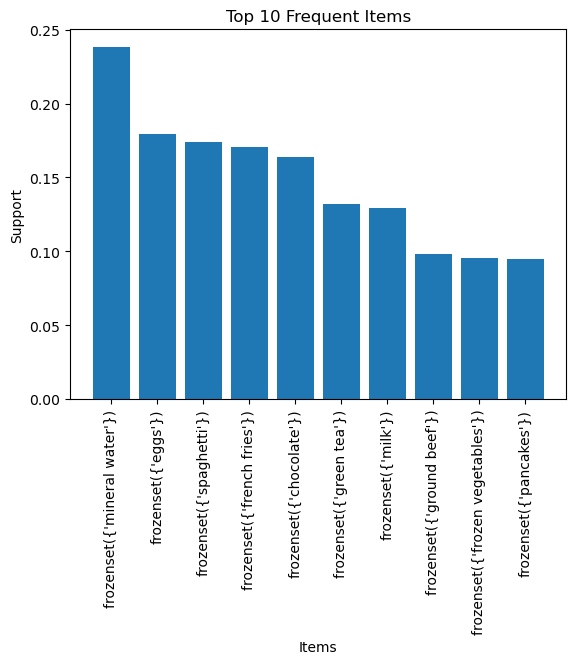

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    top_items['itemsets'].astype(str),
    top_items['support']
)
plt.xticks(rotation=90)
plt.xlabel("Items")
plt.ylabel("Support")
plt.title("Top 10 Frequent Items")
plt.show()


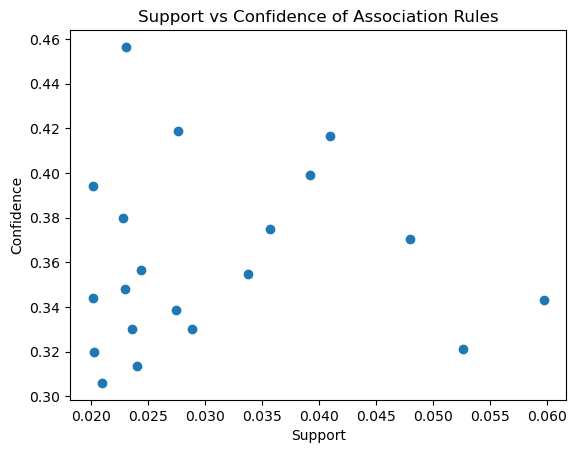

In [15]:
plt.figure()
plt.scatter(
    rules['support'],
    rules['confidence']
)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence of Association Rules")
plt.show()


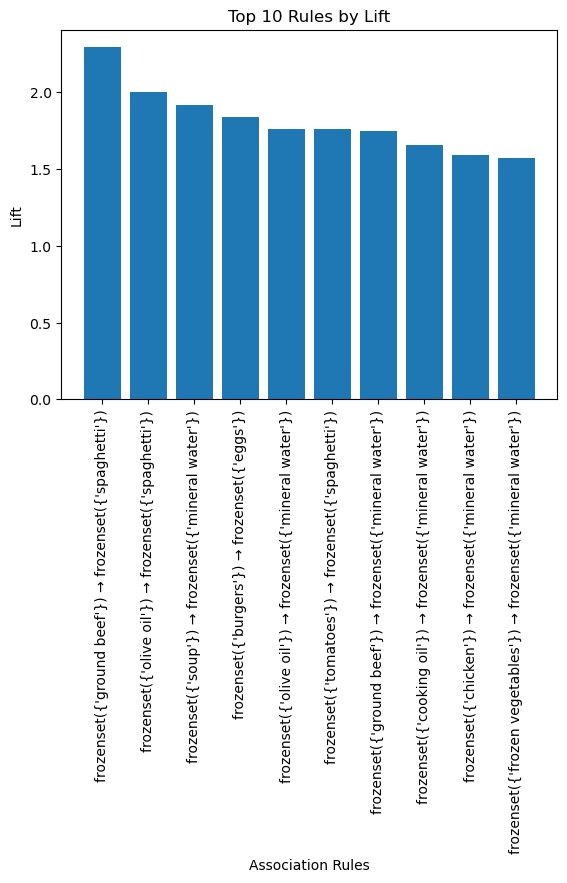

In [16]:
top_lift_rules = strong_rules.sort_values(
    by='lift', ascending=False
).head(10)

plt.figure()
plt.bar(
    top_lift_rules['antecedents'].astype(str) + " → " +
    top_lift_rules['consequents'].astype(str),
    top_lift_rules['lift']
)
plt.xticks(rotation=90)
plt.xlabel("Association Rules")
plt.ylabel("Lift")
plt.title("Top 10 Rules by Lift")
plt.show()


1.	What is lift and why is it important in Association rules?

Lift measures how much more often two items occur together compared to if they were independent.
It is important because it shows the true strength and usefulness of an association rule.


2.	What is support and Confidence. How do you calculate them?

Support tells us how often an item or itemset appears in the entire dataset.
It measures the popularity or frequency of an itemset among all transactions.

Confidence tells us how likely item B is purchased when item A is purchased.
It measures the reliability or strength of the rule 𝐴→𝐵.

3.	What are some limitations or challenges of Association rules mining?

Generates too many rules

Computationally expensive for large datasets

Sensitive to threshold values

Does not imply causation

Hard to interpret results